In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud,STOPWORDS

In [2]:
plt.style.use('default')
#sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
df = pd.read_csv('train.csv', encoding= 'utf-8')
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Como hay NaNs solo en “keyword” y “location” remplazo los NaNs por la palabra “indefinido”, ya que puede ser algo interesante a analizar. Pero antes tengo que corroborar si la palabra “indefinido” ya se está utilizando.

In [5]:
df['keyword'].isin(['indefinido']).any()

False

In [6]:
df['location'].isin(['indefinido']).any()

False

In [7]:
df = df.fillna('indefinido')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null object
location    7613 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

Veo si vale la pena que "location" sea de tipo category

In [9]:
df['location'].value_counts(normalize=True)

indefinido                                   0.33
USA                                          0.01
New York                                     0.01
United States                                0.01
London                                       0.01
Canada                                       0.00
Nigeria                                      0.00
UK                                           0.00
Los Angeles, CA                              0.00
India                                        0.00
Mumbai                                       0.00
Washington, DC                               0.00
Kenya                                        0.00
Worldwide                                    0.00
Chicago, IL                                  0.00
Australia                                    0.00
California                                   0.00
New York, NY                                 0.00
California, USA                              0.00
Everywhere                                   0.00


In [10]:
df['keyword'].value_counts(normalize=True)

indefinido                              0.01
fatalities                              0.01
deluge                                  0.01
armageddon                              0.01
damage                                  0.01
sinking                                 0.01
harm                                    0.01
body%20bags                             0.01
collided                                0.01
outbreak                                0.01
siren                                   0.01
windstorm                               0.01
fear                                    0.01
twister                                 0.01
evacuate                                0.01
collision                               0.01
hellfire                                0.01
wrecked                                 0.01
wreckage                                0.01
famine                                  0.01
whirlwind                               0.01
earthquake                              0.01
sinkhole  

Dado que hay una gran variedad de posibles locaciones no tiene mucho sentido usar category, pero si tiene sentido que "keyword" lo sea. Tambien cambiamos el tipo de dato de

In [11]:
df = df.astype({'target':'bool_',\
                'keyword':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7613 non-null category
location    7613 non-null object
text        7613 non-null object
target      7613 non-null bool
dtypes: bool(1), category(1), int64(1), object(2)
memory usage: 212.5+ KB


In [12]:
df.groupby('keyword').agg({'target':'count'})['target']

keyword
ablaze                 36
accident               35
aftershock             34
airplane%20accident    35
ambulance              38
annihilated            34
annihilation           29
apocalypse             32
armageddon             42
army                   34
arson                  32
arsonist               34
attack                 36
attacked               35
avalanche              30
battle                 26
bioterror              37
bioterrorism           30
blaze                  38
blazing                34
bleeding               35
blew%20up              33
blight                 32
blizzard               37
blood                  35
bloody                 35
blown%20up             33
body%20bag             33
body%20bagging         33
body%20bags            41
                       ..
survivors              30
terrorism              34
terrorist              31
threat                 11
thunder                38
thunderstorm           33
tornado                35
trag

In [13]:
def real(x): return (x.sum()*100/x.count())
def falso(x): return (x.sum()*100/x.count()-100)

In [14]:
miniV = df.groupby('keyword').agg({'target':[real, falso]})['target'].sort_values(by=['real']).tail(20)
miniV

,real,falso
keyword,,
forest%20fires,84.38,-15.62
mass%20murder,84.85,-15.15
buildings%20on%20fire,84.85,-15.15
airplane%20accident,85.71,-14.29
wild%20fires,87.10,-12.90
wildfire,87.88,-12.12
razed,88.57,-11.43
evacuated,88.89,-11.11
nuclear%20disaster,91.18,-8.82


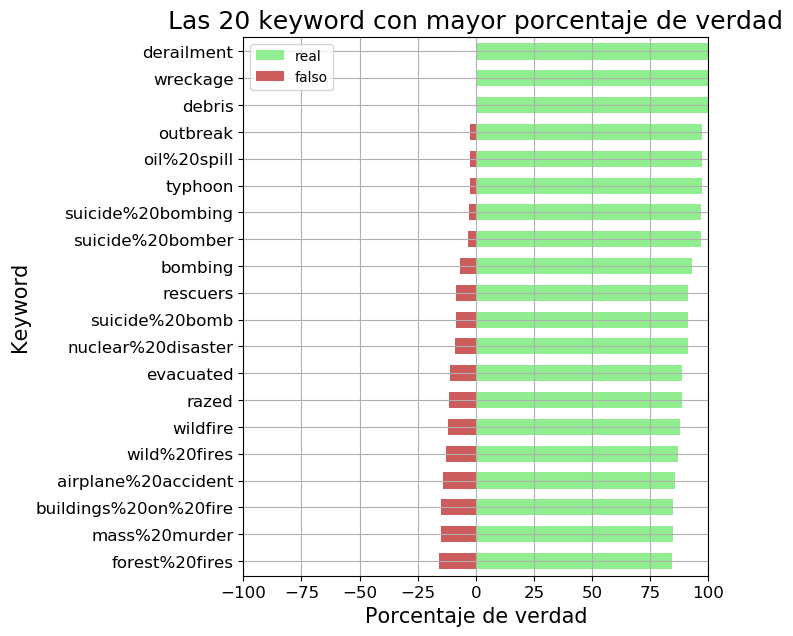

In [15]:
v = miniV.plot.barh( stacked=True, fontsize=12, color=["lightGreen","IndianRed"],\
              xlim=(-100.0, 100.0),width=0.6,figsize=(6, 7))

v.set_title('Las 20 keyword con mayor porcentaje de verdad', fontsize=18);
v.set_xlabel('Porcentaje de verdad', fontsize=15);
v.set_ylabel('Keyword', fontsize=15);
v.grid(axis='both')

In [16]:
mini = df.groupby('keyword').agg({'target':[real, falso]})['target'].sort_values(by=['real']).head(20)
mini

,real,falso
keyword,,
aftershock,0.00,-100.00
body%20bags,2.44,-97.56
ruin,2.70,-97.30
blazing,2.94,-97.06
body%20bag,3.03,-96.97
electrocute,3.12,-96.88
screaming,5.56,-94.44
traumatised,5.71,-94.29
panicking,6.06,-93.94


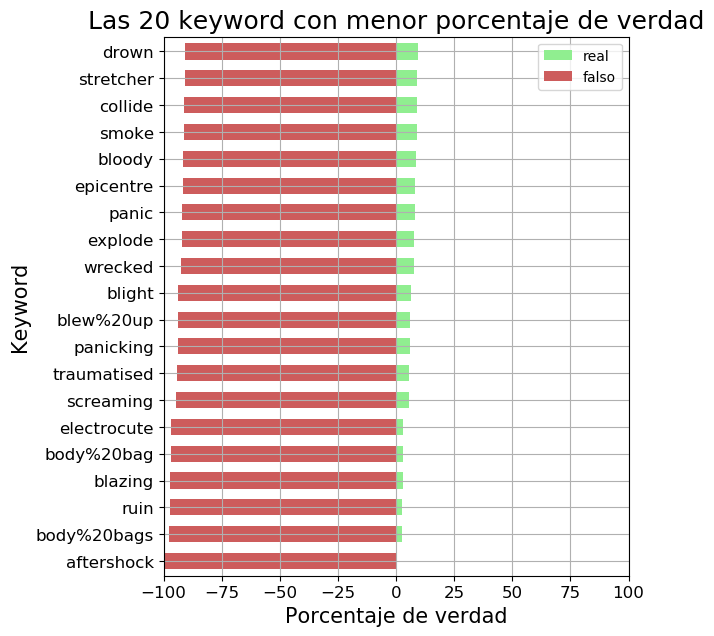

In [17]:
s = mini.plot.barh( stacked=True, fontsize=12, color=["lightGreen","IndianRed"],\
              xlim=(-100.0, 100.0),width=0.6,figsize=(6, 7))

s.set_title('Las 20 keyword con menor porcentaje de verdad', fontsize=18);
s.set_xlabel('Porcentaje de verdad', fontsize=15);
s.set_ylabel('Keyword', fontsize=15);
s.grid(axis='both')

# Veracidad de tweet segun palabras que contiene el tweet

In [18]:
df['target'].value_counts()

False    4342
True     3271
Name: target, dtype: int64

In [19]:
explo = (0,0.05)

Text(0, 0.5, '')

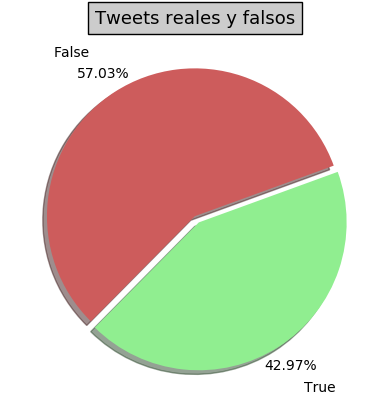

In [20]:
f = df['target'].value_counts().plot.pie(fontsize=10, autopct='%0.2f%%', pctdistance=1.15, labeldistance=1.32,\
                         shadow=True, startangle=20, colors= ["indianRed","lightGreen"], explode= explo)
plt.title("Tweets reales y falsos", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
f.set_ylabel('')

In [21]:
exclamacion1 = df[df['text'].str.contains('!') == True]
exclamacion1['target'].value_counts()

False    523
True     196
Name: target, dtype: int64

Text(0, 0.5, '')

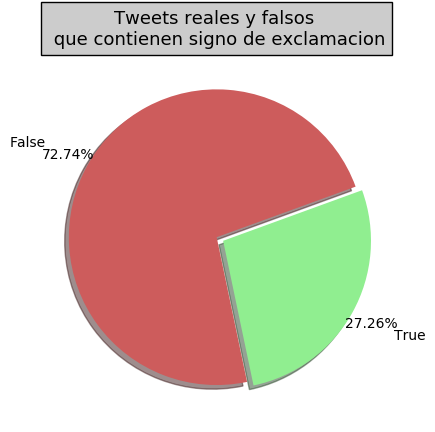

In [22]:
g = exclamacion1['target'].value_counts().plot.pie(fontsize=10, autopct='%0.2f%%', pctdistance=1.15, labeldistance=1.32,\
                         shadow=True, startangle=20, colors= ["indianRed","lightGreen"], explode= explo)
plt.title("Tweets reales y falsos \n que contienen signo de exclamacion", fontsize=13, bbox={'facecolor':'0.8', 'pad':5})
g.set_ylabel('')

### Analisis de frecuencia de aparicion de palabras en tweets

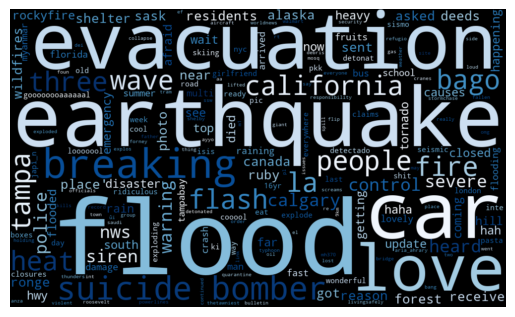

In [23]:
stopwords = set(STOPWORDS)
text = str(df['text'])
text = text.lower()

wordcloud = WordCloud(width=1000, height=600, background_color="black",colormap='Blues_r', stopwords=stopwords).generate(text)
#plt.figure(figsize=(15,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Frecuencia de palabras en todos los tweets

In [24]:
porcentaje = df[df['keyword'].str.contains('%')==True]
porcentaje['target'].value_counts()

True     680
False    485
Name: target, dtype: int64

In [25]:
dfReal = df[df['target'] == True]
dfFalso = df[df['target'] == False]

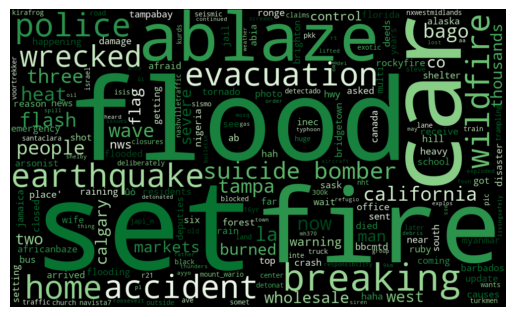

In [26]:
stopwords = set(STOPWORDS)
text = str(dfReal['text'])
text = text.lower()

wordcloud = WordCloud(width=1000, height=600, background_color="black",colormap='Greens_r', stopwords=stopwords).generate(text)
#plt.figure(figsize=(15,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Frecuencia de palabras en tweets que son reales

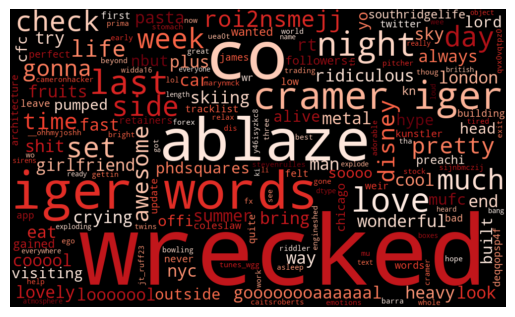

In [27]:
stopwords = set(STOPWORDS)
text = str(dfFalso['text'])
text = text.lower()

wordcloud = WordCloud(width=1000, height=600, background_color="black",colormap='Reds_r', stopwords=stopwords).generate(text)
#plt.figure(figsize=(15,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Frecuencia de palabras en tweets que son falsos